## 预处理

In [108]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [109]:
nbaData = pd.read_csv('./data/nba/nba.csv')
nbaData.head()

,TRB,AST,STL,BLK,PTS,TOV,PF
0,252,138,46,30,724,74,225
1,4,0,1,1,10,2,5
2,627,160,67,48,1393,104,231
3,5,2,1,1,4,0,9
4,82,16,11,5,105,22,68


In [110]:
lionData = pd.read_csv(r'G:\_repos_forked\kepler-mapper\examples\lion\lion-reference.csv',header=None)
lionData.head()

,0,1,2
0,-0.040110,0.224513,-0.064178
1,-0.035460,0.234662,-0.091287
2,-0.028643,0.226311,-0.091565
3,-0.036914,0.239158,-0.110594
4,-0.029853,0.231213,-0.112309


In [111]:
cactusData = pd.read_csv('./data/Cactus.txt',header=None,sep='\t')
cactusData.head()

,0,1,2
0,0.520412,0.455527,0.476147
1,0.534901,0.451687,0.492928
2,0.538826,0.464909,0.494495
3,0.562822,0.497936,0.503670
4,0.553440,0.479522,0.503670


寻找一种好的降维方法，正交化？

In [112]:
data = cactusData

In [134]:
N = len(data)
print("N :",N)

N : 3280


In [114]:
a = preprocessing.normalize(data.values)

In [115]:
k = 10

In [116]:
neigh = NearestNeighbors(n_neighbors=k+1) # 因为之后提取最近点时会包括点自身
neigh.fit(a)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=11, p=2, radius=1.0)

In [117]:
disMat,nodeMat = neigh.kneighbors(a)

In [118]:
print(disMat.shape)
print(disMat)

(3280, 11)
[[0.         0.00212683 0.00418367 ... 0.00902597 0.00905504 0.00991491]
 [0.         0.00097444 0.00634077 ... 0.01070065 0.01146758 0.01190477]
 [0.         0.00405166 0.00407049 ... 0.00874615 0.00980533 0.01019723]
 ...
 [0.         0.00254837 0.00361461 ... 0.00869066 0.00889426 0.00891001]
 [0.         0.00138642 0.00293379 ... 0.00533314 0.00561244 0.00593099]
 [0.         0.00235966 0.00443554 ... 0.0078349  0.00824264 0.00831958]]


In [119]:
print(nodeMat.shape)
print(nodeMat)

(3280, 11)
[[   0 1411    4 ... 2265 1418 2263]
 [   1 2035 2032 ...    2 2107 3210]
 [   2 1417 2265 ... 2476 2035  938]
 ...
 [3277 2856 1534 ... 2286 3209 2548]
 [3278 3199 3252 ... 2600 3224  763]
 [3279 1284 3079 ... 3078 1287 3252]]


In [120]:
a = disMat.flatten()

(array([4.000e+01, 8.600e+01, 1.020e+02, 2.060e+02, 1.920e+02, 2.800e+02,
        3.340e+02, 4.340e+02, 4.220e+02, 4.730e+02, 6.220e+02, 6.700e+02,
        1.133e+03, 1.252e+03, 1.202e+03, 9.780e+02, 1.215e+03, 1.108e+03,
        1.091e+03, 9.610e+02, 1.003e+03, 9.990e+02, 9.640e+02, 9.440e+02,
        8.880e+02, 9.910e+02, 9.330e+02, 8.990e+02, 8.020e+02, 7.920e+02,
        6.700e+02, 7.010e+02, 6.950e+02, 6.700e+02, 6.200e+02, 5.640e+02,
        5.130e+02, 5.460e+02, 4.750e+02, 3.790e+02, 3.480e+02, 3.190e+02,
        2.610e+02, 2.930e+02, 2.330e+02, 2.260e+02, 2.740e+02, 2.040e+02,
        2.400e+02, 2.400e+02, 2.230e+02, 2.060e+02, 1.560e+02, 1.460e+02,
        1.490e+02, 1.440e+02, 1.040e+02, 9.000e+01, 8.400e+01, 9.800e+01,
        8.700e+01, 7.000e+01, 9.900e+01, 8.900e+01, 8.200e+01, 7.700e+01,
        5.500e+01, 4.400e+01, 3.600e+01, 5.800e+01, 3.600e+01, 4.600e+01,
        2.900e+01, 2.900e+01, 2.200e+01, 1.200e+01, 2.000e+00, 9.000e+00,
        6.000e+00, 1.000e+00, 6.000e+0

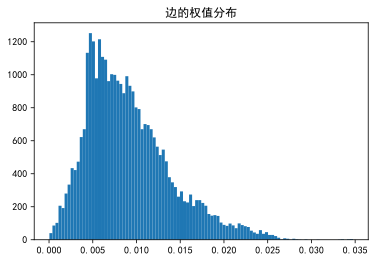

In [121]:
plt.title('边的权值分布');
plt.hist(a[a.nonzero()],bins=100)

## 建图

In [122]:
import networkx as nx

In [123]:
G = nx.Graph()

In [124]:
G.add_nodes_from(range(nodeMat.shape[0]))

In [125]:
edges = []
for i,(neighbors,distances) in enumerate(zip(nodeMat,disMat)):
    edges +=[(i, neighbors[j], distances[j]) for j in range(k+1) if neighbors[j]!=i]
print(edges[:5])

[(0, 1411, 0.002126834126769473), (0, 4, 0.004183665646151548), (0, 1417, 0.005667096842759588), (0, 937, 0.005978132305203493), (0, 938, 0.006048378882775578)]


In [126]:
G.add_weighted_edges_from(edges)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


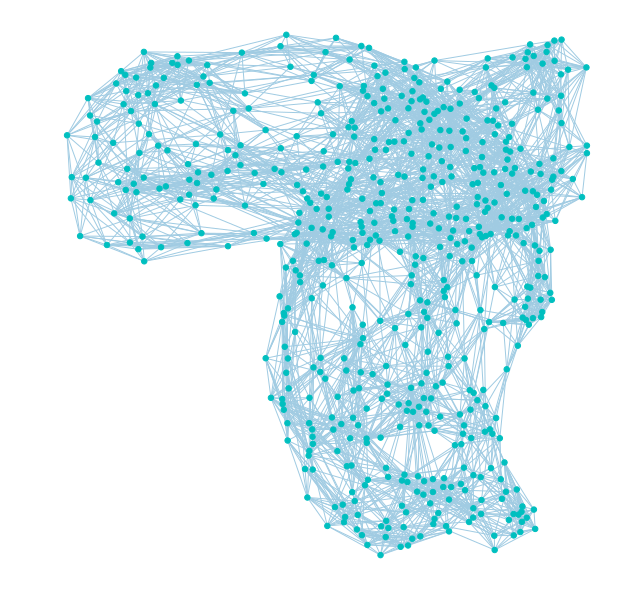

In [19]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw(G,node_shape='o',pos=pos,node_size=30,node_color='c',edge_color='#A0CBE2')

## 投票

https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html

In [127]:
import numpy as np
from collections import defaultdict

In [128]:
dis = dict(nx.all_pairs_bellman_ford_path_length(G))

In [135]:
with open('disMat','w') as f:
    f.write(str(N)+'\n')
    for i in range(N):
        for j in range(N):
            f.write(str(dis[i][j])+' ')

In [ ]:
agsasdewf

In [22]:
nodeIdx = list(range(N))

In [23]:
th = 0.01
conditon = lambda a,b,c,d:abs(dis[a][b]-dis[c][d])<th and abs(dis[a][d]-dis[b][c])<th

In [93]:
samples = 50000
subSamples = 10000

votes = defaultdict(int)

for i in range(samples):
    a,b,c,d=np.random.choice(nodeIdx,4)
    if conditon(a,b,c,d):
        for j in range(subSamples):
            e,f = np.random.choice(nodeIdx,2)
            if conditon(a,b,e,f) and conditon(c,d,e,f):
                if b>a:
                    a,b=b,a
                if d>c:
                    c,d=d,c
                votes[(a,b)]+=1
                votes[(c,d)]+=1

In [33]:
import numpy as np

In [136]:
a = np.loadtxt('./out.txt')
votes = defaultdict(int)
for i,j in zip(a.nonzero()[0],a.nonzero()[1]):
    v = a[i,j]
    assert v>0
    if i==j:continue
    if i<j:
        i,j=j,i
    votes[(i,j)] += v

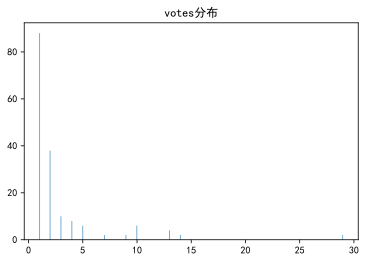

In [139]:
# plt.xlim((0,50))
plt.hist(votes.values(),bins=500);
plt.title('votes分布');

In [142]:
del dis

In [138]:
path = dict(nx.all_pairs_bellman_ford_path(G))

In [140]:
nodeSet = set()
th_votes = 0
for a,b in votes.keys():
    pi = path[a][b]
    if votes[(a,b)]>th_votes:
        nodeSet.add(pi[len(pi)//2])
print(nodeSet)

{1549, 2062, 527, 2064, 1044, 1563, 543, 3106, 2088, 2554, 1076, 2101, 2615, 3127, 1082, 572, 573, 1606, 2631, 584, 1100, 3151, 1104, 3152, 83, 2645, 1115, 1633, 2663, 2664, 1641, 1642, 1643, 3185, 115, 120, 2170, 122, 1662, 2174, 1664, 2178, 1667, 2696, 1162, 1166, 2196, 2711, 2202, 1692, 3229, 3230, 2207, 669, 1696, 676, 166, 3239, 1704, 2219, 3245, 1202, 1718, 3256, 2244, 735, 740, 2277, 742, 2279, 2804, 2296, 2808, 764, 2302, 787, 1305, 793, 1819, 1829, 295, 2889, 330, 335, 2385, 1361, 2387, 855, 2392, 2391, 2907, 349, 2910, 863, 1378, 2915, 1381, 1383, 2926, 1392, 883, 373, 374, 387, 900, 899, 902, 2439, 2440, 2955, 2959, 2449, 1426, 921, 2457, 2972, 2472, 424, 1961, 2475, 428, 2477, 940, 2481, 2490, 955, 1483, 2001, 978, 2517, 2006, 3033, 1498, 1504, 1003, 1006, 2542, 2543, 2034, 1013, 3063, 1018, 1019}


In [ ]:
# del path

## 构建子图

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


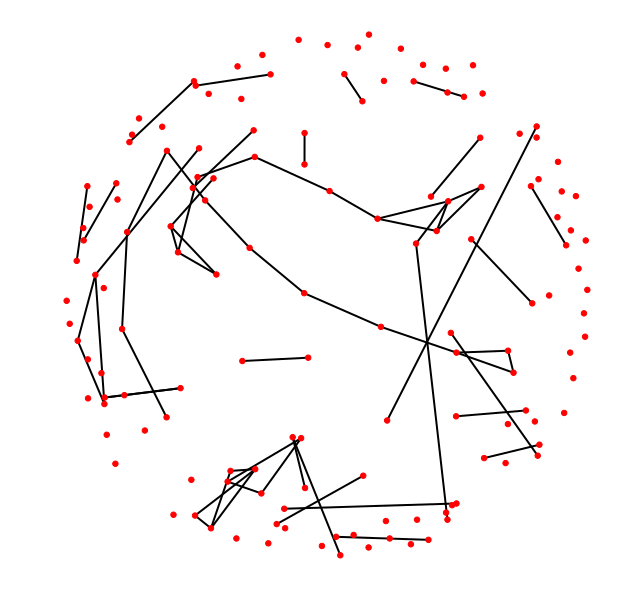

In [141]:
G2 = G.subgraph(nodeSet)
plt.figure(figsize=(8,8))
nx.draw(G2,node_shape='o',node_size=30,width=2)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


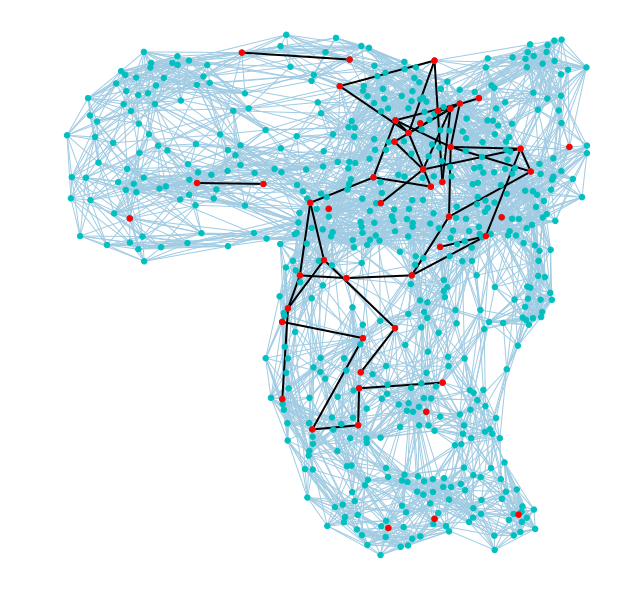

In [88]:
plt.figure(figsize=(8,8))
nx.draw(G,node_shape='o',node_size=30,pos=pos, node_color='c' ,edge_color='#A0CBE2')
nx.draw(G2,node_shape='o',pos=pos, node_size=30,width=2)
# nx.drawing.nx_pylab.draw_networkx_nodes(G,pos,nodeSet,node_size=50)
# nx.drawing.nx_pylab.draw_networkx_edges(G,pos,votes.keys(),width=1.5,edge_color='y')